# Proyek Analisis Data: [PRSA_Data_Wanliu_20130301-20170228]
- **Nama:** [Adelheid Chantal Lauw]
- **Email:** [mc232d5x0363@student.devacademy.id]
- **ID Dicoding:** [MC232D5X0363]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola musiman polusi udara di suatu lokasi?
- Apa faktor utama yang memengaruhi tingkat PM2.5 di berbagai wilayah?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Kota yang akan dianalisis adalah Kota Wanliu
# Membaca file yang diupload dari komputer
Wanliu_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")


**Insight:**
- read_csv() berfungsi untuk membaca berkas CSV dan mengubahnya menjadi DataFrame Pandas.

### Assessing Data

In [ ]:
# Cek apakah ada nilai NaN atau missing value di dataset
print("Jumlah nilai NaN di setiap kolom:")
print(Wanliu_df.isnull().sum())

Jumlah nilai NaN di setiap kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


**Insight:**
- metode isnull() untuk mengidentifikasi missing value dalam dataset.
metode sum() untuk menjumlahkan missing value pada setiap kolom di dataset.

### Cleaning Data

In [ ]:
# Membuat kolom 'date' untuk analisis berbasis waktu
Wanliu_df['date'] = pd.to_datetime(Wanliu_df[['year', 'month', 'day', 'hour']])

# Menghapus baris yang memiliki nilai NaN atau Inf sebelum regresi
# Membuat kolom x dan y yang akan diprediksi
X = Wanliu_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']] # kolom-kolom independen sebagai prediktor
y = Wanliu_df['PM2.5'] # kolom target yang akan diprediksi

# Menghapus baris dengan NaN atau Inf
X = X.replace([float('inf'), float('-inf')], None)
X = X.dropna()
y = y.loc[X.index]  # Pastikan y sesuai dengan indeks X

# Pastikan kembali tidak ada NaN lagi
print("Jumlah nilai NaN setelah dibersihkan:")
print(X.isnull().sum())

# Cek Data Outlier
# Menghitung Q1 (25%) dan Q3 (75%) untuk PM2.5 dan PM10
Q1 = Wanliu_df[['PM2.5', 'PM10']].quantile(0.25)
Q3 = Wanliu_df[['PM2.5', 'PM10']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menyaring data agar tidak ada data outlier
Wanliu_clean_df = Wanliu_df[~((Wanliu_df[['PM2.5', 'PM10']] < batas_bawah) | (Wanliu_df[['PM2.5', 'PM10']] > batas_atas)).any(axis=1)]

# Cek ukuran data sebelum dan sesudah
print(f"Jumlah data sebelum pembersihan: {Wanliu_df.shape[0]}")
print(f"Jumlah data setelah pembersihan: {Wanliu_clean_df.shape[0]}")

Jumlah nilai NaN setelah dibersihkan:
TEMP    0
PRES    0
DEWP    0
RAIN    0
WSPM    0
dtype: int64
Jumlah data sebelum pembersihan: 35064
Jumlah data setelah pembersihan: 33217


**Insight:**
- pd.to_datetime() berfungsi untuk mengubah data waktu menjadi format datetime di Pandas.
- Fungsi replace() untuk mengganti nilai Inf dan -Inf dengan None.
- Fungsi dropna() untuk menghapus baris yang memiliki nilai Nan. Kode di atas, X.dropna() artinya fungsi akan menghapus baris dengan nilai NaN dalam variabel X.
- Fungsi loc() untuk menyesuaikan y agar hanya berisi baris yang masih ada di X setelah cleaning.
- Fungsi isnull() seharusnya termasuk ke assessing data, namun di bagian ini dilakukan kembali untuk memastikan kembali.
- Metode untuk memeriksa data outlier dengan menghitung kuantil dengan .quantile(0.25) dan .quantile(0.75). Q1 artinya nilai di bawahnya terdapat 25% data dan Q3 nilai di bawahnya terdapat 75%.
- Membuang data di luar rentang dengan menambahkan ~() dengan batasan yang digunakan dengan pemisah | (or).

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Hitung rata-rata PM2.5 dan PM10 per bulan
monthly_mean = Wanliu_clean_df.groupby('month')[['PM2.5', 'PM10']].mean().reset_index()
# Heatmap Korelasi
korelasi = Wanliu_clean_df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

**Insight:**
-  fungsi groupby() untuk mengelompokkan data berdasarkan bulan/month
- metode mean() untuk menghitung rata-rata dari kolom PM2.5 dan PM10 di setiap bulannya.
- metode reset_index() untuk mengembalikan hasil dalam bentuk DataFrame yang lebih rapi.
- corr() metode untuk menghitung korelasi antara kolom numerik dalam DataFrame.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

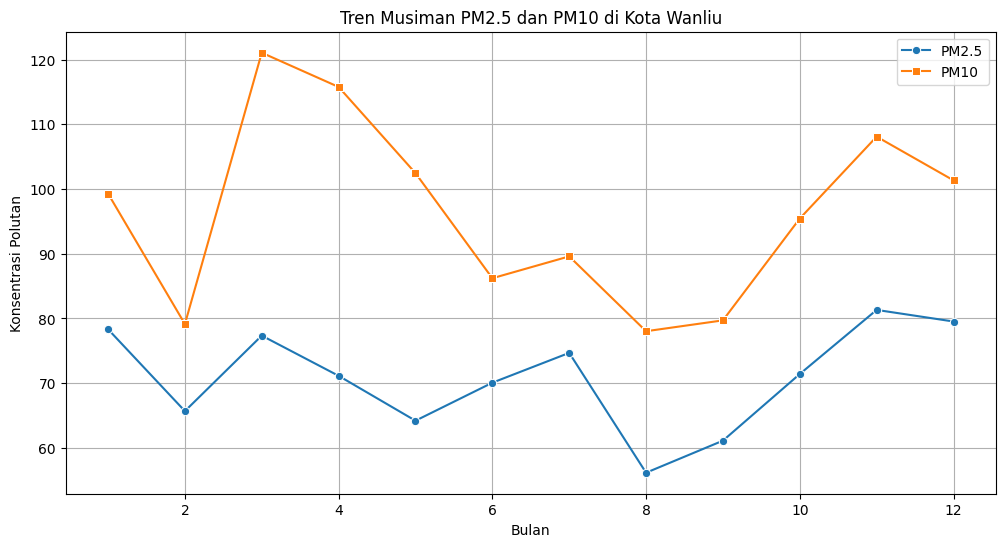

In [ ]:
# Plot Tren Musiman
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean['month'], y=monthly_mean['PM2.5'], label='PM2.5', marker='o')
sns.lineplot(x=monthly_mean['month'], y=monthly_mean['PM10'], label='PM10', marker='s')

plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')
plt.title('Tren Musiman PM2.5 dan PM10 di Kota Wanliu')

plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2:

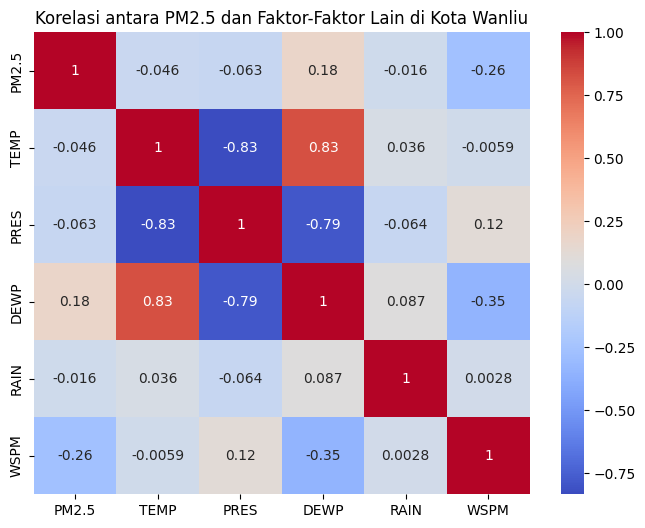

In [ ]:
#Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title('Korelasi antara PM2.5 dan Faktor-Faktor Lain di Kota Wanliu')
plt.show()

X = Wanliu_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
y = Wanliu_df['PM2.5']

**Insight:**
- plt.figure berfungsi untuk membuat kanvas kosong berukuran 12x6 inci.
- sns.lineplot() untuk membuat grafik lurus untuk variable PM2.5 dengan sumbu x sebagai bulan 1 sampai 12 dan sumbu y sebagai rata-rata PM2.5 per bulannya.
Parameter label untuk memberi label garis dan parameter marker='o' untuk memberikan tanda titik di setiap bulannya.
- plt.xlabel dan plt.ylabel untuk memberi label pada sumbu X dan Y.
- plt.title untuk memberikan judul pada grafik.
- plt.legend() untuk memberikan perbedaan garis PM2.5 dan PM10.
- plt.grid() untuk menambahkan grid agar lebih jelas.
- plt.show() untuk menampilkan grafik.
- sns.heatmap() untuk membuat heatmap berdasarkan matriks korelasi antar variabel dalam matriks warna menggunakan seaborn.
- annot=True memiliki fungsi untuk menampilkan angka dalam setiap sel heatmap.
- cmap untuk memberikan warna pada heatmap.

## Analisis Lanjutan (Opsional)

## Conclusion

Analisis dilakukan dengan menggunakan data dari Kota Wanliu.
- Terjadinya perubahan musim yang tidak menentu sepanjang tahun yang disebabkan oleh banyak faktor. PM merupakan Particulate Matter yang artinya semakin kecil nilainya (partikel udaranya) semakin berbahaya bagi kesehatan. Tren musiman PM10 cenderung lebih tinggi dibandingkan dengan PM2.5. Dengan asumsi musim panas terjadi pada bulan Juni-Agustus, maka pada musim panas tingkat polusi udara cenderung lebih rendah dibandingkan pada musim panas, begitu juga sebaliknya ketika musim hujan tingkat polutannya bertambah.
- Berdasarkan heatmap yang dihasilkan dari perhitungan, variabel TEMP (suhu udara) memberikan nilai korelasi negatif yang artinya ketika suhu meningkat, kadar PM2.5 cenderung menurun. Variabel PRES (tekanan udara) dan DEWP (titik embun) tidak memberikan pengaruh besar karena nilainya yang sangat kecil. Variabel RAIN(hujan), memiliki nilai korelasi negatif , sehingga ketika terjadi hujan polusi udara akan menurun. Variabel WSPM(kecepatan angin) memiliki pengaruh terhadap penyebaran polutan PM2.5 ini, semakin besar nilainya atau tinggi kecepatan anginnya konsentrasi PM2.5 semakin rendah polutan akan tersebar luas.